## FEDn API Example

This notebook provides an example of how to use the FEDn API to organize experiments and to analyze validation results. We will here run one training session using FedAvg and one session using FedAdam and compare the results.

When you start this tutorial you should have a deployed FEDn Network up and running, and you should have created the compute package and the initial model, see the README for instructions.

In [1]:
from fedn import APIClient
import time
import uuid
import json
import matplotlib.pyplot as plt
import numpy as np
import collections

We make a client connection to the FEDn API service. Here we assume that FEDn is deployed locally in pseudo-distributed mode with default ports.

In [14]:
!fedn package create --path client
# !fedn run build --path client

2024-05-14 09:30:30 [INFO] Created package package.tgz


In [2]:
DISCOVER_HOST = '127.0.0.1'
DISCOVER_PORT = 8092
client = APIClient(DISCOVER_HOST, DISCOVER_PORT)

Initialize FEDn with the compute package and seed model. Note that these files needs to be created separately by follwing instructions in the README.

In [3]:
client.set_active_package('package.tgz', 'numpyhelper')
client.set_active_model('seed.npz')
seed_model = client.get_active_model()
print(seed_model)

{'committed_at': 'Wed, 15 May 2024 20:04:53 GMT', 'id': '6645156536e8c4eb5c8d11eb', 'key': 'models', 'model': 'c3ea4b4a-9153-4e92-966d-18b5717e5146', 'parent_model': None, 'session_id': None}


Next we start a training session using FedAvg and wait until it has finished:

In [5]:
session_id = "experiment1"

session_config = {
                    "helper": "numpyhelper",
                    "id": session_id,
                    "aggregator": "fedavg",
                    "model_id": seed_model['model'],
                    "rounds": 20
                 }

result_fedavg = client.start_session(**session_config)

In [17]:
session_id = "experiment2"

session_config = {
                    "helper": "numpyhelper",
                    "id": session_id,
                    "aggregator": "fedavg",
                    "model_id": seed_model['model'],
                    "rounds": 50
                 }

result_fedavg_2 = client.start_session(**session_config)

In [21]:
session_id = "experiment3"

session_config = {
                    "helper": "numpyhelper",
                    "id": session_id,
                    "aggregator": "fedavg",
                    "model_id": seed_model['model'],
                    "rounds": 100
                 }

result_fedavg_3 = client.start_session(**session_config)

We wait for the session to finish: 

In [ ]:
while not client.session_is_finished(session_id):
    time.sleep(2)

Next, we retrive all model validations from all clients, extract the training accuracy metric, and compute its mean value accross all clients

In [6]:
mean_acc = []

In [22]:
models = client.get_model_trail()

acc = []
acc_test = []
for model in models:
    
    model_id = model["model"]
    validations = client.get_validations(model_id=model_id, session_id=session_id)
    print(validations)

    a = []
    b = []
    for validation in validations['result']:
        metrics = json.loads(validation['data'])
        a.append(metrics['training_accuracy']*100)
        b.append(metrics['test_accuracy']*100)
        
    acc.append(a)
    acc_test.append(b)
acc = [x for x in acc if x != []]
acc_test = [x for x in acc_test if x != []]
mean_acc = [np.mean(x) for x in acc]
mean_acc_test = [np.mean(x) for x in acc_test]

{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{'count': 0, 'result': []}
{

In [23]:
# Get max mean accuracy
max_mean_acc = max(mean_acc)
max_mean_acc_index = mean_acc.index(max_mean_acc)
print('Max mean accuracy:', max_mean_acc)
print('Max mean accuracy index:', max_mean_acc_index)

max_mean_acc_test = max(mean_acc_test)
max_mean_acc_test_index = mean_acc_test.index(max_mean_acc_test)
print('Max mean accuracy test:', max_mean_acc_test)
print('Max mean accuracy test index:', max_mean_acc_test_index)

Max mean accuracy: 90.6900480389595
Max mean accuracy index: 95
Max mean accuracy test: 90.7997912374985
Max mean accuracy test index: 91


In [9]:
len(mean_acc)

20

In [10]:
models = client.get_model_trail()

In [11]:
models

[{'committed_at': 'Tue, 14 May 2024 07:16:20 GMT',
  'id': '66430fc469a6451bdbfb229e',
  'key': 'models',
  'model': 'bddfa7fb-c996-476c-9b46-a4f21cc4be97',
  'parent_model': None,
  'session_id': None},
 {'committed_at': 'Tue, 14 May 2024 07:22:36 GMT',
  'id': '6643113c69a6451bdbfb22a1',
  'key': 'models',
  'model': '80dfa68c-00d7-4bb4-bf3d-961f612d7649',
  'parent_model': 'bddfa7fb-c996-476c-9b46-a4f21cc4be97',
  'session_id': 'experiment1'},
 {'committed_at': 'Tue, 14 May 2024 07:22:52 GMT',
  'id': '6643114c69a6451bdbfb22a3',
  'key': 'models',
  'model': 'd8a02739-39e2-4b12-bfd8-d925bf89849d',
  'parent_model': '80dfa68c-00d7-4bb4-bf3d-961f612d7649',
  'session_id': 'experiment1'}]

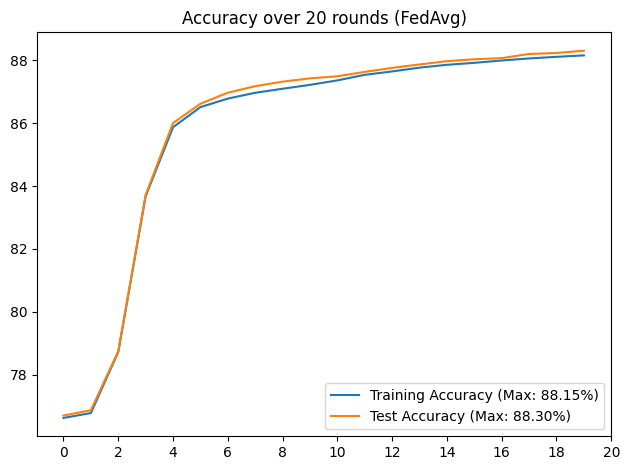

In [16]:
x = range(0,len(mean_acc))

plt.figure()

plt.plot(x, mean_acc, label='Training Accuracy (Max: {:.2f}%)'.format(max_mean_acc))
plt.plot(x, mean_acc_test, label='Test Accuracy (Max: {:.2f}%)'.format(max_mean_acc_test))

plt.xticks(range(0,21, 2))
plt.legend()

plt.title('Accuracy over 20 rounds (FedAvg)')
plt.tight_layout()
# plt.show()

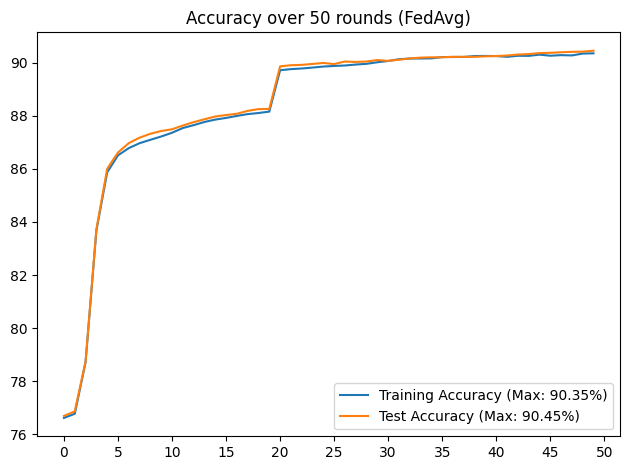

In [20]:
x = range(0,len(mean_acc))

plt.figure()

plt.plot(x, mean_acc, label='Training Accuracy (Max: {:.2f}%)'.format(max_mean_acc))
plt.plot(x, mean_acc_test, label='Test Accuracy (Max: {:.2f}%)'.format(max_mean_acc_test))

plt.xticks(range(0,51, 5))
plt.legend()

plt.title('Accuracy over 50 rounds (FedAvg)')
plt.tight_layout()

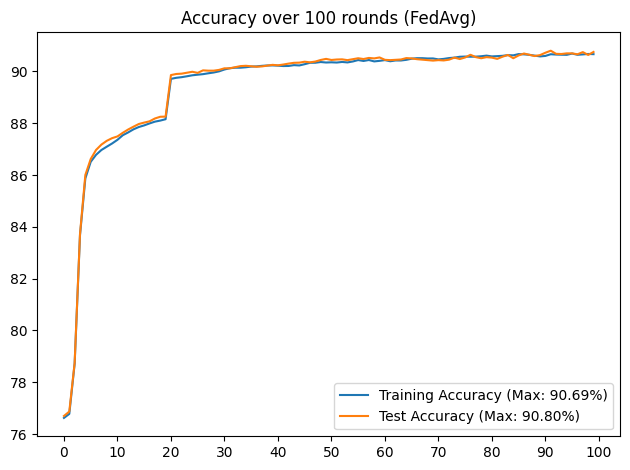

In [24]:
x = range(0,len(mean_acc))

plt.figure()

plt.plot(x, mean_acc, label='Training Accuracy (Max: {:.2f}%)'.format(max_mean_acc))
plt.plot(x, mean_acc_test, label='Test Accuracy (Max: {:.2f}%)'.format(max_mean_acc_test))

plt.xticks(range(0,101, 10))
plt.legend()

plt.title('Accuracy over 100 rounds (FedAvg)')
plt.tight_layout()

Let's try another aggregation algorithm. We start another session using FedOpt (FedAdam)

In [ ]:
session_config_fedopt = {
                    "helper": "numpyhelper",
                    "session_id": "experiment_fedopt",
                    "aggregator": "fedopt",
                    "model_id": seed_model['model_id'],
                    "rounds": 10
                 }

result_fedopt = client.start_session(**session_config_fedopt)

In [ ]:
while not client.session_is_finished("experiment_fedopt"):
    time.sleep(2)

In [ ]:
models = client.list_models(session_id = "experiment_fedopt")

validations = []
acc = collections.OrderedDict()
for model in models["result"]:
    model_id = model["model"]
    validations = client.list_validations(modelId=model_id)
    for _ , validation in validations.items(): 
        metrics = json.loads(validation['data'])
        try:
            acc[model_id].append(metrics['training_accuracy'])
        except KeyError: 
            acc[model_id] = [metrics['training_accuracy']]
            
mean_acc_fedopt = []
for model, data in acc.items():
    mean_acc_fedopt.append(np.mean(data))
mean_acc_fedopt.reverse()

Finally, plot the resulting accuracy

In [ ]:
x = range(1,len(mean_acc_fedavg)+1)
plt.plot(x, mean_acc_fedavg, x, mean_acc_fedopt)
plt.legend(['FedAvg', 'FedAdam'])